# <font color='#49C6E5' size = "+4" face = "Times New Roman"><center>Imports</center></font>
<center>Here are the neccessary modules that are needed to run the notebook.</center>

In [ ]:
# Math Modules
import numpy as np

# Graph Plotting Modules
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Tensorflow/Keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import L2

# <font color='#49C6E5' size = "+4" face = "Times New Roman"><center>Credits</center></font>
<center>Here are the credits in Harvard Citation of all the websites that I have referred to</center>

<p style="padding-left: 20%; padding-right: 20%;">
<b>Learnt some helpful tips from:</b><br>
Fchollet, C. (2020). Keras Documentation: Simple mnist convnet. Keras. Retrieved March 9, 2023, from https://keras.io/examples/vision/mnist_convnet/ 
</p>
<br><br>

# <font color='#49C6E5' size = "+4" face = "Times New Roman"><center>Setting up the MINST Dataset</center></font>
<center>In this section, we will load the MINST dataset and start analysing and modifying the data for our model to train efficiently.</center>
<br><br>

In [ ]:
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]


# <font color='#49C6E5' size = "+4" face = "Times New Roman"><center>Model Creation</center></font>

In [39]:
model = Sequential([
    Conv2D(filters=60, kernel_size=5, input_shape=(28, 28, 1),activation='relu', 
            kernel_initializer='glorot_normal', kernel_regularizer=L2(0.001), padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=30, kernel_size=3, activation='relu', 
            kernel_initializer='glorot_normal', kernel_regularizer=L2(0.001), padding="same"),
    BatchNormalization(),


    Conv2D(filters=15, kernel_size=3, activation='relu', 
            kernel_initializer='glorot_normal', kernel_regularizer=L2(0.001), padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    BatchNormalization(),

    Dense(64, activation='relu', kernel_initializer='glorot_normal'),
    BatchNormalization(),

    Dense(50, activation='relu', kernel_initializer='glorot_normal'),
    BatchNormalization(),

    Dense(num_classes, activation='softmax')

])

# Compile model
model.compile(loss='categorical_crossentropy', 
 optimizer='Nadam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
 epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

# Save model
model.save("saved_models/numberpredictor.h5", save_format="h5")


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 batch_normalization_63 (Bat  (None, 28, 28, 60)       240       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 14, 14, 30)        16230     
                                                                 
 batch_normalization_64 (Bat  (None, 14, 14, 30)       120       
 chNormalization)                                                
                                                     

# <font color='#49C6E5' size = "+4" face = "Times New Roman"><center>Model Evaluations</center></font>
<center>Here, we will take a look at the model's accuracy score and its loss over the epochs it has trained. This can help us deduce how the model was performing.</center>
<br><br>

In [34]:
# Accuracy Over Epoch Graph
# Figure Setup
fig, axs = plt.subplots(figsize=(10, 5), dpi=80)

# Plot Accuracy and Val_accuracy Graphs
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')

# Labels
plt.title('Accuracy of Model', fontsize=25)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Show Graph
plt.show()

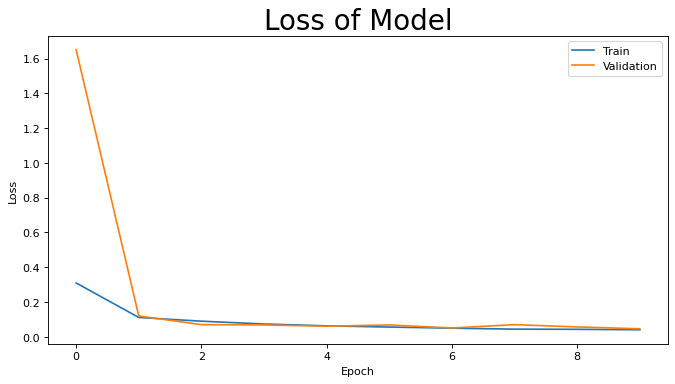

In [35]:
# Checking For Overfitting
# Figure Setup
plt.figure(figsize=(10, 5), dpi=80)

# Plot Accuracy and Val_accuracy loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Labels
plt.title('Loss of Model', fontsize=25)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper right')

# Show Graph
plt.show()